<center><font size=13 style="bold" text-align="center">Phân tích dữ liệu ứng dụng 19_1</font> <br>
<font size=7>Đồ án thực hành #1</font>


<font size=7>PTDLUD#5</font></center>



| Thành viên             | MSSV          |
|:-----------------------|:-------------:|
| Nguyễn Thị Kim Ngân    | 19120598      |
| Nguyễn Thị Tiểu Mi     | 19120577      |
| Phạm Sơn Tùng          | 19120423      |
| Nguyễn Phước Huy       | 19120529      |

In [ ]:
#Khai báo thư viện
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/TungPham24/PTDLUD_Data/main/02-ThucHanh/AB_NYC_2019.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<font size=10 font-style="bold">PHẦN 1: QUAN SÁT VÀ MÔ TẢ DỮ LIỆU</font>

**<font size=5>1. Cho biết kiểu dữ liệu của các thuộc tính</font>**

In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**<font size=5>2. Đối với cột Price</font>**

In [ ]:
print('Giá phòng cao nhất: ', data['price'].max())
print('Giá phòng thấp nhất: ', data['price'].min())
print('Giá phòng trung bình: ', data['price'].mean())
print('Mức giá xuất hiện nhiều: ', data['price'].mode())

Giá phòng cao nhất:  10000
Giá phòng thấp nhất:  0
Giá phòng trung bình:  152.7206871868289
Mức giá xuất hiện nhiều:  0    100
dtype: int64


In [ ]:
print('Độ lệch chuẩn: ', data['price'].std())

Độ lệch chuẩn:  240.15416974718758


***Nhận xét:*** Ta thấy cột **'price'** có độ lệch chuẩn rất lớn<br>
=> Điều này chỉ ra rằng dữ liệu dao động rất mạnh, tức là giá phòng phân phối cách xa trung tâm

In [ ]:
print('Trung vị: ', data['price'].median())

Trung vị:  106.0


***Nhận xét***: Cột price có mean > median > mode (152.72 > 106 > 100) <br>
=> Dữ liệu lệch phải


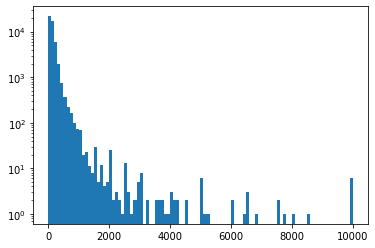

In [ ]:
#Đồ thị histogram cho cột price
plt.hist(data['price'], bins = 100, log = True)
plt.show()

***Nhận xét:*** Từ đồ thị histogram, ta thấy dữ liệu phân phối không đều, cụ thể là lệch phải

**<font size=5>3. Mô tả số lượng missing values của mỗi thuộc tính</font>**

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Ta thấy có 4 thuộc tính chứa missing values: name, host_name, last_review và review_per_month

**<font size=5>4. Tính tỉ lệ % missing values của mỗi thuộc tính</font>**

In [ ]:
for col in data.columns:
  percentage = data[col].isnull().mean()
  print(f'{col}: \t{round(percentage*100,2)}%')

id: 	0.0%
name: 	0.03%
host_id: 	0.0%
host_name: 	0.04%
neighbourhood_group: 	0.0%
neighbourhood: 	0.0%
latitude: 	0.0%
longitude: 	0.0%
room_type: 	0.0%
price: 	0.0%
minimum_nights: 	0.0%
number_of_reviews: 	0.0%
last_review: 	20.56%
reviews_per_month: 	20.56%
calculated_host_listings_count: 	0.0%
availability_365: 	0.0%


Ta thấy dữ liệu ở cột last_review và reviews_per_month bị thiếu nghiêm trọng nhất (20.56%), missing values ở cột name (0.03%) và host_name (0.04%) là không đáng kể.

**<font size=5>5. Xử lý dòng có missing values:</font>**

Xóa bỏ dòng có missing values:

In [ ]:
data_dropnull = data.dropna()
data_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

Điền giá trị missing value:

Điền giá trị missing value cho cột last_review:

Do cột last_review là kiểu dữ liệu thời gian (date), nên ta sẽ điền missing value bằng giá trị mode (giá trị 0, mean và median không có ý nghĩa)

In [ ]:
last_review_mode = ''.join(data['last_review'].mode())
data['last_review'].fillna(last_review_mode,inplace = True)

Điền giá trị cho cột review_per_month

In [ ]:
rpm_mean = data['reviews_per_month'].mean()
rpm_mode = data['reviews_per_month'].mode()
rpm_med = data['reviews_per_month'].median()

In [ ]:
rpm_mean

1.3732214298586618

In [ ]:
rpm_mode

0    0.02
dtype: float64

In [ ]:
rpm_med

0.72

(array([2.2042e+04, 6.6300e+03, 4.3220e+03, 2.7320e+03, 1.5650e+03,
        7.6100e+02, 3.3900e+02, 2.1100e+02, 9.3000e+01, 5.9000e+01,
        3.7000e+01, 1.6000e+01, 9.0000e+00, 1.1000e+01, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 21 Patch objects>)

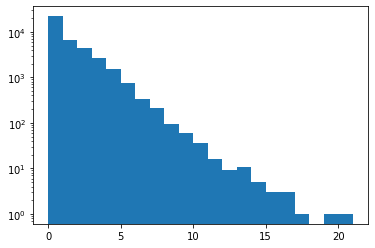

In [ ]:
plt.hist(data['reviews_per_month'],bins=range(0,22),log = True)

Thông qua biểu đồ, ta thấy số dòng mà review_per_month nhận giá trị trong đoạn [0,1] là nhiều nhất trong dataset nhưng không cách biệt quá lớn, vì vậy ta dùng median để điền missing value

(array([3.2094e+04, 6.6300e+03, 4.3220e+03, 2.7320e+03, 1.5650e+03,
        7.6100e+02, 3.3900e+02, 2.1100e+02, 9.3000e+01, 5.9000e+01,
        3.7000e+01, 1.6000e+01, 9.0000e+00, 1.1000e+01, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 21 Patch objects>)

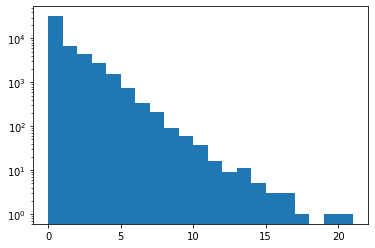

In [ ]:
data['reviews_per_month'].fillna(rpm_med, inplace = True)
plt.hist(data['reviews_per_month'],bins=range(0,22),log = True)

Thông thường, phần trăm missing value **dưới 3%** thì ta loại bỏ missing value. <br>
Ở đây, ta thấy phần trăm missing value của 2 thuộc tính **'name'** và **'host_name'** rất nhỏ, lần lượt là **0.03%** và **0.04%** <br>
=> Ta tiến hành loại bỏ missing value đối với 2 thuộc tính này.


In [ ]:
data = data.dropna(subset= ['name', 'host_name'])

**<font size=5>6. Quan sát outliers:</font>**

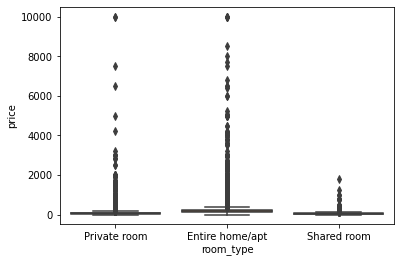

In [ ]:
sns.boxplot(x = 'room_type', y = 'price', data = data)

Ta nhận thấy ở cả 3 loại phòng thì đều tồn tại rất nhiều outliers. Outliers nhiều nhất là Entire homw/apt room_type, sau đó là private room và ít outliers nhất là shared room.

<font size=10 font-style="bold">Phần 2: Visualization</font>


* **Có bao nhiêu `neighbourhood_group`, liệt kê không trùng**

In [ ]:
df_neighbor = data['neighbourhood_group'].unique()
size = len(df_neighbor)
print('Danh sách neighbourhood_group: ', df_neighbor)
print('Số lượng: ', size)

Danh sách neighbourhood_group:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Số lượng:  5


* **Tạo bảng**

In [ ]:
df_table = data['neighbourhood_group'].value_counts()
df_percent = []
for value in df_table.values:
    tmp = value/sum(df_table.values)*100
    df_percent.append(round(tmp,4))

df_2 = pd.DataFrame(df_table)
df_3 = df_2.reset_index()
df_3.rename(columns ={'index':'neighbourhood_group_','neighbourhood_group':'fluency'}, inplace = True)
df_3['percent_appear'] = df_percent
df_3
print(tabulate(df_3, headers=df_3.columns, tablefmt="fancy_grid", showindex="always"))

╒════╤════════════════════════╤═══════════╤══════════════════╕
│    │ neighbourhood_group_   │   fluency │   percent_appear │
╞════╪════════════════════════╪═══════════╪══════════════════╡
│  0 │ Manhattan              │     21643 │          44.2978 │
├────┼────────────────────────┼───────────┼──────────────────┤
│  1 │ Brooklyn               │     20089 │          41.1171 │
├────┼────────────────────────┼───────────┼──────────────────┤
│  2 │ Queens                 │      5664 │          11.5928 │
├────┼────────────────────────┼───────────┼──────────────────┤
│  3 │ Bronx                  │      1089 │           2.2289 │
├────┼────────────────────────┼───────────┼──────────────────┤
│  4 │ Staten Island          │       373 │           0.7634 │
╘════╧════════════════════════╧═══════════╧══════════════════╛



**<font size=5>Câu 2: Có bao nhiêu room_type, liệt kê không trùng. Lập bảng thống kê room_type,
tần suất và % lượt thuê cho từng room_type. Vẽ bar chart để so sánh.</font>**

In [ ]:
room_type = data["room_type"].unique()
print('Total of room_type: ', len(room_type), room_type)


Total of room_type:  3 ['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
freq_table = pd.crosstab(data['room_type'], 'Tần suất')
freq_table= freq_table/len(data)
  
freq_table

col_0,Tần suất
room_type,
Entire home/apt,0.519731
Private room,0.456548
Shared room,0.023722


Vẽ bar chart để so sánh.

(array([22306.,     0.,     0.,     0.,     0., 25393.,     0.,     0.,
            0.,  1159.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

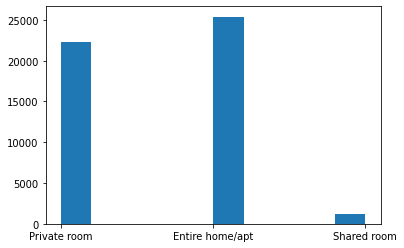

In [ ]:
plt.hist(data['room_type'])

Ta thấy, tần suất thuê phòng Entire home/apt là cao nhất, đứng thứ 2 là loại phòng Private room và cuối cùng là Shared room

**<font size=5>Câu 3: Giá trung bình mỗi đêm là bao nhiêu?</font>**

Giá trung bình theo loại phòng (`room_type`)

In [ ]:
data.groupby('room_type')[['price']].mean()

,price
room_type,
Entire home/apt,211.806994
Private room,89.794360
Shared room,70.075928


**Nhận xét:** 
* Trong cái loại phòng thì phòng loại phòng là cao nhất là **Entire home/apt** với $211.8

* Xếp thứ 2 là loại phòng **Private room** với $89.8

* Thấp nhất là loại phòng **Shared room** với $70 


**Giải thích:** 
* Thường khách hàng đi du lịch sẽ có xu hướng đi theo gia đình hoặc nhóm bạn nên họ sẽ thường thuê phòng dạng **Entire home/apt** nên phòng nào sẽ có xu hướng được thuê nhiều để có thể tiết kiệm chi phí du lịch

* Loại phòng **Private room** cũng sẽ là một lựa chọn lý tưởng cho các cá nhân hoặc các cặp đôi đi du lịch, do số lượng người có thể ở phòng này thấp hơn **Entire home/apt** nên giá thành thấp hơn

* Còn loại phòng **Shared room** thì sẽ ít người thuê hơn vì nó không có nhu cầu riêng tư nên giá thành sẽ thấp hơn so với 2 loại phòng còn lại 



Giá trung bình theo khu vực (`neighbourhood_group`)

In [ ]:
data.groupby('neighbourhood_group')[['price']].mean()

,price
neighbourhood_group,
Bronx,87.469238
Brooklyn,124.410523
Manhattan,196.897473
Queens,99.536017
Staten Island,114.812332


**Nhận xét:** 
* Phòng có giá cao nhất tại quận **Manhattan**. Đây là nơi có mật độ dân cư đông nhất với rất nhiều tòa nhà chọc trời và cũng là khu vực giàu có nhất ở Hoa Kỳ nên giá phòng cao nhất cũng là điều tất yếu

* Phòng có giá thấp nhất tại quận **Bronx**. Đây là nơi chưa thực sự phát triển ở New York nên du lịch của nó cũng không phát triển mạnh, dẫn đến giá phòng thấp hơn các quận khác 

**<font size=5>Câu 4: Có sự khác biệt gì giữa lưu trú tại `Shared room` và `Entire room` giữa các vùng lân cận?</font>**

* Số lượt thuê phòng `Shared Room` và `Entire Room` của từng khu vực

In [ ]:
df_neighbours = data['neighbourhood'].unique()
df_4 = data[['neighbourhood','room_type','host_id']]
df_4 = df_4.groupby(['neighbourhood','room_type']).count().reset_index()
df_4.rename(columns={'host_id':'count'}, inplace=True)
df_4_new = pd.DataFrame(columns=['neighbourhood','shared_room','entire_room'])
for item in df_neighbours:
    row = [item]
    shared_count = 0
    entire_count = 0
    shared = df_4[(df_4['neighbourhood']==item) & (df_4['room_type']=='Shared room')]
    if shared.empty == False:
        shared_count = shared['count'].values[0]
    entire = df_4[(df_4['neighbourhood']==item) & (df_4['room_type']=='Entire home/apt')]
    if entire.empty == False:
        entire_count = entire['count'].values[0]
    row.append(shared_count)
    row.append(entire_count)
    df_4_new.loc[len(df_4_new.index)] = row
print('Số lượt thuê phòng Shared Room và Entire Room của từng khu vực: ')
df_4_new

Số lượt thuê phòng Shared Room và Entire Room của từng khu vực: 


,neighbourhood,shared_room,entire_room
0,Kensington,4,73
1,Midtown,23,1100
2,Harlem,49,1035
3,Clinton Hill,9,346
4,East Harlem,45,486
...,...,...,...
216,Bull's Head,0,0
217,New Dorp,0,1
218,Rossville,0,1
219,Breezy Point,0,0


In [ ]:
shared_mean = df_4_new['shared_room'].mean()
entire_mean = df_4_new['entire_room'].mean()

print('Số lượt thuê phòng Shared Room trung bình: ', round(shared_mean,2))
print('Số lượt thuê phòng Entire Room trung bình: ', round(entire_mean,2))

shared_max = df_4_new.iloc[df_4_new['shared_room'].astype(int).argmax()]
entire_max = df_4_new.iloc[df_4_new['entire_room'].astype(int).argmax()]

df_s = shared_max.reset_index()
df_e = entire_max.reset_index()
df_s.rename(columns={'index':'neighbourhood',7:'value'}, inplace=True)
df_e.rename(columns={'index':'neighbourhood',12:'value'}, inplace=True)

print('Khu vực có lượt thuê phòng Shared Room nhiều nhất là: \n')
print(tabulate(df_s, headers=df_s.columns, tablefmt="fancy_grid", showindex="always"))
print('Khu vực có lượt thuê phòng Enrire Room nhiều nhất là: \n')
print(tabulate(df_e, headers=df_e.columns, tablefmt="fancy_grid", showindex="always"))

Số lượt thuê phòng Shared Room trung bình:  5.24
Số lượt thuê phòng Entire Room trung bình:  114.9
Khu vực có lượt thuê phòng Shared Room nhiều nhất là: 

╒════╤═════════════════╤════════════════╕
│    │ neighbourhood   │ value          │
╞════╪═════════════════╪════════════════╡
│  0 │ neighbourhood   │ Hell's Kitchen │
├────┼─────────────────┼────────────────┤
│  1 │ shared_room     │ 99             │
├────┼─────────────────┼────────────────┤
│  2 │ entire_room     │ 1186           │
╘════╧═════════════════╧════════════════╛
Khu vực có lượt thuê phòng Enrire Room nhiều nhất là: 

╒════╤═════════════════╤══════════════╕
│    │ neighbourhood   │ value        │
╞════╪═════════════════╪══════════════╡
│  0 │ neighbourhood   │ Williamsburg │
├────┼─────────────────┼──────────────┤
│  1 │ shared_room     │ 32           │
├────┼─────────────────┼──────────────┤
│  2 │ entire_room     │ 1890         │
╘════╧═════════════════╧══════════════╛


**Quan sát** <br>
* Ta thấy được rõ ràng sẽ có những khu vực có số lượt thuê rất cao, trong khi đó những khu vực khác thì không có, hoặc có rất ít lượt thuê phòng => Chỉ tập trung đi du lịch tại những khu vực nhất định
* Số lượt thuê phòng `Entire room/apt` nhìn chung sẽ cao hơn cho với `Shared room` => Có thể cho thấy xu hướng thuê phòng hiện tại.
* Khu vực có lượt thuê phòng `Entire room/apt` cao nhất 1891 là ***Willicamsburg***
* Khu vực có lượt thuê phòng `Shared room` cao nhất 99là ***Hell's Kitchen***
* Số lượt thuê phòng `Shared room` trung bình là 5
* Số lượt thuê phòng `Entire room/apt` trung bình là 114

**<font size=5>Câu 5: Giá trung bình cho các Private room như thế nào? LIệt kê bảng dữ liệu và vẽ biểu đồ so sánh.</font>**

In [ ]:
data.groupby('room_type')[['price']].mean()

,price
room_type,
Entire home/apt,211.806994
Private room,89.794360
Shared room,70.075928


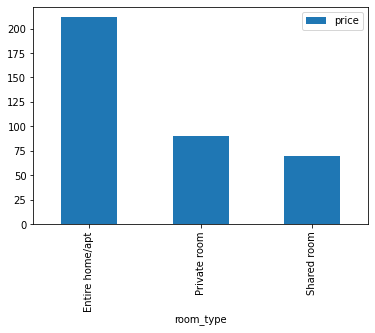

In [ ]:
data.groupby('room_type')[['price']].mean().plot(kind = "bar")


Ta thấy, giá trung bình của Private đứng thứ 2 (cao hơn Shared room và thấp hơn Entire home/apt)

**<font size=5>Câu 6: Vùng nào là nơi lưu trú rẻ nhất?</font>**

In [ ]:
df_6_n = data.groupby('neighbourhood')['price'].mean().reset_index()
df_6_n


,neighbourhood,price
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,171.779221
4,Astoria,117.187778
...,...,...
216,Windsor Terrace,138.993631
217,Woodhaven,67.170455
218,Woodlawn,60.090909
219,Woodrow,700.000000


Text(0, 0.5, 'Giá trị trung bình')

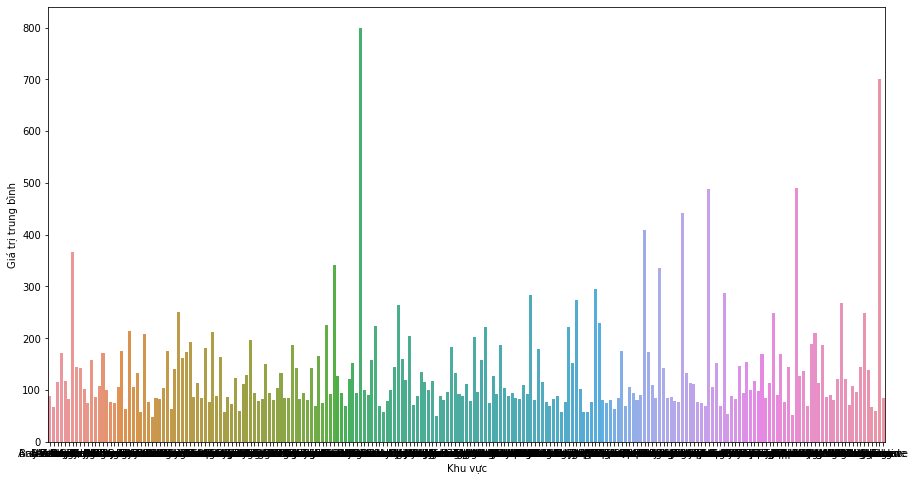

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_6_n, x='neighbourhood',y='price')
ax.set_xlabel("Khu vực")
ax.set_ylabel("Giá trị trung bình")


In [ ]:
df_6 = data.groupby('neighbourhood_group')['price'].mean().reset_index()
df_6

,neighbourhood_group,price
0,Bronx,87.469238
1,Brooklyn,124.410523
2,Manhattan,196.897473
3,Queens,99.536017
4,Staten Island,114.812332


Text(0, 0.5, 'Giá trị trung bình')

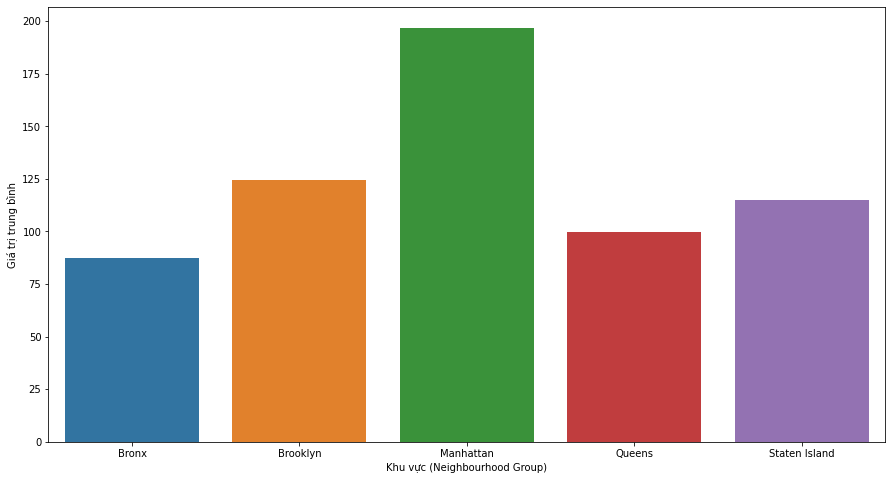

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_6, x='neighbourhood_group',y='price')
ax.set_xlabel("Khu vực (Neighbourhood Group)")
ax.set_ylabel("Giá trị trung bình")

**Nhận xét**: Nơi lưu trú rẻ nhất theo đánh giá trung bình giá phòng là ***Bronx***

**<font size=5>Câu 7: Giá trung bình các loại phòng ở các vùng lân cận</font>**

Giá trung bình các vùng lân cận cho Entire home/pt

In [ ]:
df_entire_home_apt = data[data['room_type'] == 'Entire home/apt']
df_entire_home_apt_neighbourhood = df_entire_home_apt.groupby('neighbourhood')[['price']]
df_entire_home_apt_neighbourhood.mean()

,price
neighbourhood,
Allerton,123.062500
Arden Heights,76.000000
Arrochar,189.700000
Arverne,224.625000
Astoria,142.199475
...,...
Windsor Terrace,165.147826
Woodhaven,114.100000
Woodlawn,65.500000


Giá trung bình các vùng lân cận cho Private room

In [ ]:
df_private_room = data[data['room_type'] == 'Private room']
df_private_room_neighbourhood = df_private_room.groupby('neighbourhood')[['price']]
df_private_room_neighbourhood.mean()

,price
neighbourhood,
Allerton,65.769231
Arden Heights,41.000000
Arrochar,47.090909
Arverne,87.740741
Astoria,96.178138
...,...
Williamsburg,85.749373
Windsor Terrace,67.380952
Woodhaven,53.939394


Giá trung bình các vùng lân cận cho Shared room

In [ ]:
df_shared_room = data[data['room_type'] == 'Shared room']
df_shared_room_neighbourhood = df_shared_room.groupby('neighbourhood')[['price']]
df_shared_room_neighbourhood.mean()

,price
neighbourhood,
Arverne,38.000000
Astoria,151.160000
Battery Park City,55.000000
Bay Ridge,56.833333
Bay Terrace,32.000000
...,...
West Village,180.000000
Williamsburg,84.937500
Woodhaven,34.500000
